In [6]:
import numpy as np
from tensorflow import keras

# Load MNIST data using Keras
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

print(train_images.shape)
print(train_labels.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
(60000, 28, 28)
(60000,)


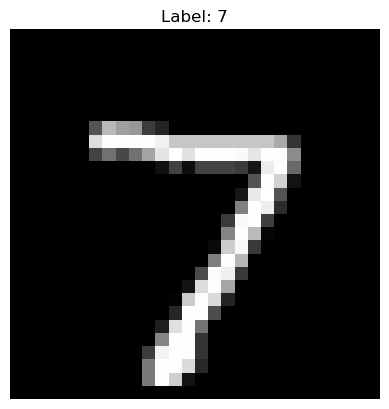

In [8]:
import matplotlib.pyplot as plt

plt.imshow(test_images[0], cmap='gray')
plt.title(f"Label: {test_labels[0]}")
plt.axis('off')
plt.show()

In [ ]:
# we will normalize the pixel values from [0, 255] to [-0.5, 0.5] range
train_images = (train_images / 255.0) - 0.5
test_images = (test_images / 255.0) - 0.5

# we need to add a 3rd dimension to the images since the keras conv2D layer expects a 3D input
train_images = np.expand_dims(train_images, axis=3)
test_images = np.expand_dims(test_images, axis=3)

print(train_images.shape)
print(test_images.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense # type: ignore

num_filters = 8
filter_size = (3, 3)
pool_size = 2

model = Sequential([
    Conv2D(num_filters, filter_size, input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=pool_size),
    Flatten(),
    Dense(10,activation='softmax')
])

model.compile(
    'adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

d:\Alex\softuri\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
from tensorflow.keras.utils import to_categorical

model.fit(
    train_images,
    to_categorical(train_labels),
    epochs = 3,
    validation_data=(test_images, to_categorical(test_labels)),
)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9047 - loss: 0.3339 - val_accuracy: 0.9462 - val_loss: 0.1877
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9550 - loss: 0.1572 - val_accuracy: 0.9628 - val_loss: 0.1227
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9664 - loss: 0.1163 - val_accuracy: 0.9674 - val_loss: 0.1001


In [16]:
# saving the model locally 

model.save_weights('cnn.weights.h5')

In [17]:
predictions = model.predict(test_images[:5])

print(np.argmax(predictions, axis=1))

print(test_labels[:5])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
[7 2 1 0 4]
[7 2 1 0 4]
